In [1]:
import librosa
import numpy as np
import pandas as pd
import os

In [2]:
# X, sr = librosa.load('./train/audio/bed/00f0204f_nohash_0.wav')
X, sr = librosa.load('./train/audio/happy/0bd689d7_nohash_0.wav')

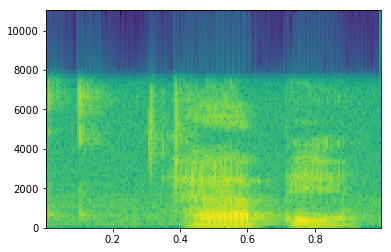

In [3]:
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
%matplotlib inline
# librosa.display.waveplot(np.array(X),sr=22050)
specgram(np.array(X), Fs=22050)
plt.show()

In [4]:
X.shape

(22050,)

In [3]:
stft = np.abs(librosa.stft(X))
stft.shape

(1025, 44)

In [4]:
mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T, axis=0)
mfcc.shape

(40,)

In [5]:
chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T, axis=0)
chroma.shape

(12,)

In [6]:
mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sr).T,axis=0)
mel.shape

(128,)

In [7]:
contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sr).T, axis=0)
contrast.shape

(7,)

In [8]:
tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sr).T, axis=0)
tonnetz.shape

(6,)

In [9]:
ext_features = np.hstack([mfcc, chroma, mel, contrast, tonnetz])
ext_features.shape

(193,)

In [12]:
features

array([[ -3.76102868e+02,   1.16375135e+02,  -2.35297331e+01,
          2.93929951e+01,  -2.43531757e+01,  -1.39335455e+00,
         -3.03380672e+01,  -2.78760679e+00,  -1.66085420e+01,
         -1.13872006e+01,   3.36229058e+00,  -8.20994823e+00,
          4.45586577e+00,  -1.44737158e+01,   4.35404059e-01,
         -6.81997598e+00,  -6.59035116e+00,  -7.92917612e+00,
         -7.15072224e+00,  -1.67054141e+00,  -8.85200164e+00,
          1.34835783e+00,  -5.39972344e+00,  -5.05426153e+00,
         -6.97435243e+00,  -4.56415051e+00,  -7.65884823e+00,
         -6.71417410e+00,  -2.57539763e+00,  -7.62158188e+00,
          4.64967804e-01,  -2.87964436e+00,  -2.12468743e+00,
         -2.01608235e+00,  -4.39438442e+00,  -3.56517865e+00,
         -3.86686165e+00,  -3.94245375e+00,  -4.27556845e+00,
         -1.64924935e+00,   6.07854258e-01,   7.15963326e-01,
          7.51490994e-01,   6.81750612e-01,   7.87788433e-01,
          7.39919997e-01,   6.37720861e-01,   6.68446964e-01,
        

In [10]:
features = np.empty((0,193))
features = np.vstack([features, ext_features])
features.shape

(1, 193)

In [44]:
[x[0] for x in os.walk('./data/')]

['./data/',
 './data/down',
 './data/eight',
 './data/five',
 './data/four',
 './data/go',
 './data/left',
 './data/nine',
 './data/no',
 './data/off',
 './data/on',
 './data/one',
 './data/right',
 './data/seven',
 './data/six',
 './data/stop',
 './data/three',
 './data/two',
 './data/up',
 './data/yes',
 './data/zero']

In [47]:
commands = next(os.walk('./data'))[1]

In [48]:
commands

['down',
 'eight',
 'five',
 'four',
 'go',
 'left',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'six',
 'stop',
 'three',
 'two',
 'up',
 'yes',
 'zero']

In [51]:
command_lookup = np.eye(len(commands))

In [58]:
command_lookup[commands.index('five')]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [75]:
files = next(os.walk('./data/down'))[2]
cmd = np.repeat('down',len(next(os.walk('./data/down'))[2]))
pd.DataFrame({'command':cmd, 'file':files})

,command,file
0,down,00176480_nohash_0.wav
1,down,004ae714_nohash_0.wav
2,down,00b01445_nohash_0.wav
3,down,00b01445_nohash_1.wav
4,down,00f0204f_nohash_0.wav
5,down,0132a06d_nohash_0.wav
6,down,0132a06d_nohash_1.wav
7,down,0132a06d_nohash_2.wav
8,down,0132a06d_nohash_3.wav
9,down,0132a06d_nohash_4.wav


In [82]:
data = pd.DataFrame(data=None, columns=['command','file'])
for command in commands:
    drty = './data/'+command
    files = next(os.walk(drty))[2]
    cmd = np.repeat(command,len(next(os.walk(drty))[2]))
    temp = pd.DataFrame({'command':cmd, 'file':files})
    data = data.append(temp)

In [86]:
data.tail()

,command,file
2371,zero,ffd2ba2f_nohash_1.wav
2372,zero,ffd2ba2f_nohash_2.wav
2373,zero,ffd2ba2f_nohash_3.wav
2374,zero,ffd2ba2f_nohash_4.wav
2375,zero,fffcabd1_nohash_0.wav


In [93]:
y = np.array([command_lookup[commands.index(i)] for i in data.command])

(47348, 20)